**Lista de Exercícios N2**

Tema: Grafos e Algoritmos de Busca (Dijkstra, A*, em-ordem, pré-ordem e pós-ordem)

Disciplina: Inteligência Artificial\
Ambiente: Google Colab\
Entrega: via repositório individual no GitHub

**Nome completo: Jean William da Costa Buzaglo**\
**Matricula: 2255693**\
**Turma: ENGCO221N01**

**Regras Gerais**

- Trabalho individual.

- Linguagem: Python 3 (Google Colab).

- É permitido usar: heapq, numpy, matplotlib, dataclasses.

- Proibido usar funções prontas de shortest path (networkx.shortest_path, scipy.sparse.csgraph.dijkstra, etc.).

O Notebook (.ipynb) deve conter:

- Identificação (nome, turma, link do GitHub)

- Código, testes e reflexões

- Seções organizadas conforme o roteiro abaixo.

**Parte A — Dijkstra (Caminho Mínimo em Grafos Ponderados Positivos)**

> Imagine que você está projetando um sistema de navegação para ambulâncias em uma cidade. Cada interseção é representada como um nó e cada rua como uma aresta ponderada com o tempo médio de deslocamento. Você precisa encontrar a rota mais rápida entre o hospital e o local de atendimento, garantindo que o caminho tenha custo mínimo e seja correto mesmo em grandes redes urbanas.

**Atividades**

- Implemente o algoritmo de Dijkstra, retornando o custo mínimo (dist) e os predecessores (parent).

- Crie uma função reconstruct_path(parent, target) que reconstrua o trajeto.

Teste o algoritmo em um grafo de exemplo.

**Explique (Questões Discursivas):**

1. Por que Dijkstra exige arestas não negativas?

2. Qual a complexidade do algoritmo com lista de adjacência e heapq?

💡 Dica: Compare seu resultado com um mapa simples — se mudar o peso de uma rua, a rota muda?

In [8]:
import heapq
from dataclasses import dataclass, field

# algoritmo de dijsktra
def dijkstra(grafo, inicio):
    distancia_min = {no: float('inf') for no in grafo}
    predecessor = {no: None for no in grafo}
    distancia_min[inicio] = 0

    fila = [(0, inicio)]

    while fila:
        custo_atual, no_atual = heapq.heappop(fila)
        if custo_atual > distancia_min[no_atual]:
            continue

        for vizinho, peso in grafo[no_atual].items():
            nova_distancia = custo_atual + peso
            if nova_distancia < distancia_min[vizinho]:
                distancia_min[vizinho] = nova_distancia
                predecessor[vizinho] = no_atual
                heapq.heappush(fila, (nova_distancia, vizinho))

    return distancia_min, predecessor

# reconstrucao do caminho
def reconstruct_path(predecessor, destino):
    caminho = []
    atual = destino
    while atual is not None:
        caminho.append(atual)
        atual = predecessor[atual]
    caminho.reverse()
    return caminho


# grafo de exemplo
grafo = {
    'Hospital': {'Rua A': 3, 'Rua B': 4},
    'Rua A': {'Hospital': 3, 'Rua C': 5, 'Rua D': 8},
    'Rua B': {'Hospital': 4, 'Rua D': 2},
    'Rua C': {'Rua A': 5, 'Rua D': 1, 'Destino': 3},
    'Rua D': {'Rua A': 8, 'Rua B': 2, 'Rua C': 1, 'Destino': 2},
    'Destino': {'Rua C': 3, 'Rua D': 2}
}

inicio = 'Hospital'
destino = 'Destino'

distancia, predecessor = dijkstra(grafo, inicio)
caminho = reconstruct_path(predecessor, destino)

print(f"Custo mínimo partindo de {inicio} até cada ponto:")
for no, d in distancia.items():
    print(f"{no}: {d}")

print(f"\nCaminho mais rápido até {destino}:")
print(" ➜ ".join(caminho))
print(f"\nCusto total: {distancia[destino]}")


Custo mínimo partindo de Hospital até cada ponto:
Hospital: 0
Rua A: 3
Rua B: 4
Rua C: 7
Rua D: 6
Destino: 8

Caminho mais rápido até Destino:
Hospital ➜ Rua B ➜ Rua D ➜ Destino

Custo total: 8


# ***Respostas das Discursivas A:***

*1.   O algoritmo de Dijkstra exige arestas não negativas porque ao visitar um nó com menor custo atual, ele assume que já encontrou o melhor caminho até ele. Se tivesse arestas negativas, um caminho posterior poderia diminuir o custo total, invalidando essa suposição, ou seja, arestas negativas quebrariam a lógica do algoritmo.*

*2.   A complexidade se dá pela fórmula O ( ( V + E ) logV ), onde:*

          V = número de vértices;
          E = número de arestas;
          O fator log V vem do uso da heapq (fila de prioridade);
*O tempo que o algoritmo leva depende do número de pontos da cidade (V) e do número de ruas/conexões (E), multiplicado pelo custo de manter a fila de prioridades ordenada (log V). Quanto mais pontos e ruas, mais tempo ele vai levar, mas a heap ajuda a não ter que procurar o menor custo manualmente.*

*3.   Se mudar o peso de uma rua no grafo, a rota final vai mudar sim, mostrando que o algoritmo está funcionando corretamente, pois vai priorizar sempre a menor distância total entre o ponto inicial e o destino.*

**Parte B — A-Star (Busca Informada com Heurística Admissível)**

> Agora, considere um robô autônomo que deve se deslocar por um labirinto 2D, evitando obstáculos e chegando ao destino no menor tempo possível.
Diferente do Dijkstra, o robô pode usar uma heurística (como a distância ao alvo) para priorizar rotas promissoras, economizando tempo de busca.

**Atividades**

1. Gere um grid 20x20 com ~15% de obstáculos aleatórios.

2. Implemente a função heuristic(a, b) (distância Manhattan).

3. Desenvolva o algoritmo a_star(grid, start, goal, h) e teste-o.

**Explique (Questões Discursivas):**

1. A* vs Dijkstra: qual expande menos nós?

2. Por que a heurística Manhattan é admissível nesse caso?

💡 Cenário real: O A* é amplamente usado em robôs aspiradores, drones e jogos. Seu desafio é aplicar o mesmo raciocínio.

Nós expandidos: 303
Caminho encontrado com 38 passos.



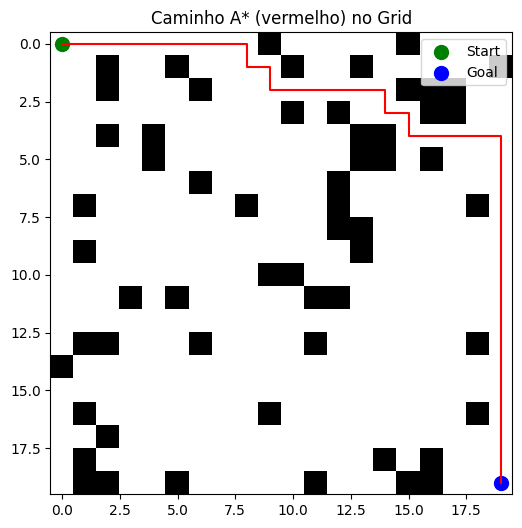

In [7]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

# grid 20x20 com obstáculos 15%
def gerar_grid(tamanho=20, obstaculos=0.15, seed=None):
    if seed is not None:
        np.random.seed(seed)
    grid = np.zeros((tamanho, tamanho), dtype=int)
    num_obstaculos = int(tamanho * tamanho * obstaculos)
    obstaculos_coords = np.random.choice(tamanho * tamanho, num_obstaculos, replace=False)
    for idx in obstaculos_coords:
        r, c = divmod(idx, tamanho)
        grid[r, c] = 1
    return grid

# heurística de manhattan
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# algoritmo a-star
def a_star(grid, start, goal, h):
    rows, cols = grid.shape
    open_heap = []
    heapq.heappush(open_heap, (h(start, goal), 0, start))

    came_from = {}
    g_score = {start: 0}
    closed = set()
    nodes_expanded = 0

    while open_heap:
        f, g, current = heapq.heappop(open_heap)
        if current in closed:
            continue
        closed.add(current)
        nodes_expanded += 1

        if current == goal:
            caminho = []
            while current in came_from:
                caminho.append(current)
                current = came_from[current]
            caminho.append(start)
            caminho.reverse()
            return caminho, nodes_expanded

        for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]:
            nr, nc = current[0] + dr, current[1] + dc
            if 0 <= nr < rows and 0 <= nc < cols and grid[nr, nc] == 0:
                vizinho = (nr, nc)
                tentative_g = g_score[current] + 1
                if vizinho not in g_score or tentative_g < g_score[vizinho]:
                    came_from[vizinho] = current
                    g_score[vizinho] = tentative_g
                    f_vizinho = tentative_g + h(vizinho, goal)
                    heapq.heappush(open_heap, (f_vizinho, tentative_g, vizinho))

    return None, nodes_expanded

# teste e visualização
grid = gerar_grid(seed=42)
start = (0, 0)
goal = (19, 19)
grid[start] = 0
grid[goal] = 0

caminho, expandidos = a_star(grid, start, goal, heuristic)

print(f"Nós expandidos: {expandidos}")
if caminho:
    print(f"Caminho encontrado com {len(caminho)-1} passos.\n")
else:
    print("Nenhum caminho encontrado.")

# desenha o grid e o caminho
plt.figure(figsize=(6,6))
plt.imshow(grid, cmap='Greys', origin='upper')
if caminho:
    ys, xs = zip(*caminho)
    plt.plot(xs, ys, color='red')
plt.scatter(start[1], start[0], color='green', s=100, label='Start')
plt.scatter(goal[1], goal[0], color='blue', s=100, label='Goal')
plt.legend()
plt.title('Caminho A* (vermelho) no Grid')
plt.show()


# ***Respostas das Discursivas B:***


*1.   O algoritmo A** *expande menos nós, porque ele usa uma heurística para estimar a distância até o objetivo e prioriza caminhos mais promissores. Já o Dijkstra explora todos os caminhos possíveis com o menor custo acumulado, sem considerar a direção do destino.*

*2.   A heurística Manhattan é admissível nesse caso porque nunca superestima o custo real, ela considera apenas movimentos horizontais e verticais, que são os únicos permitidos no grid. Ou seja, o valor estimado da heurística é sempre menor ou igual ao custo real do caminho mais curto.*



**Parte C — Árvores Binárias e Percursos (DFS em-ordem, pré-ordem e pós-ordem)**

> Você está desenvolvendo um sistema de recomendação que organiza produtos em uma árvore binária de busca (BST), conforme o preço. Cada nó é um produto e a travessia da árvore pode ser usada para: 1. Ordenar produtos (em-ordem); 2. Clonar a estrutura (pré-ordem); 3. Calcular totais ou liberar memória (pós-ordem);

**Atividades**

1. Crie uma BST com os valores: [50, 30, 70, 20, 40, 60, 80, 35, 45].

Implemente os percursos:

1. in_order(root)

2. pre_order(root)

3. post_order(root)

Teste se as saídas correspondem às travessias esperadas.

**Explique (Questões Discursivas):**

1. Em que situação cada tipo de percurso é mais indicado?

In [6]:
# classe que representa 1 nó da árvore
class Node:
    def __init__(self, valor):
        self.valor = valor
        self.esquerda = None
        self.direita = None

# inserir nós na árvore
def inserir(root, valor):
    if root is None:
        return Node(valor)
    if valor < root.valor:
        root.esquerda = inserir(root.esquerda, valor)
    else:
        root.direita = inserir(root.direita, valor)
    return root

# percursos
def em_ordem(root):
    if root:
        em_ordem(root.esquerda)
        print(root.valor, end=' ')
        em_ordem(root.direita)

def pre_ordem(root):
    if root:
        print(root.valor, end=' ')
        pre_ordem(root.esquerda)
        pre_ordem(root.direita)

def pos_ordem(root):
    if root:
        pos_ordem(root.esquerda)
        pos_ordem(root.direita)
        print(root.valor, end=' ')


# construcao da árvore e teste
valores = [50, 30, 70, 20, 40, 60, 80, 35, 45]
raiz = None

for v in valores:
    raiz = inserir(raiz, v)

print("Percurso em-ordem:")
em_ordem(raiz)
print("\n\nPercurso pré-ordem:")
pre_ordem(raiz)
print("\n\nPercurso pós-ordem:")
pos_ordem(raiz)


Percurso em-ordem:
20 30 35 40 45 50 60 70 80 

Percurso pré-ordem:
50 30 20 40 35 45 70 60 80 

Percurso pós-ordem:
20 35 45 40 30 60 80 70 50 

# ***Respostas das Discursivas C:***


*1.   O percurso em-ordem é utilizado quando o objetivo é obter os elementos da árvore em ordem crescente, o que o torna ideal para exibir ou ordenar dados.*

*O percurso pré-ordem é indicado quando é necessário clonar ou reconstruir a estrutura da árvore, pois visita primeiro o nó raiz e depois seus filhos.*

*Já o percurso pós-ordem é usado quando se deseja liberar memória ou realizar cálculos envolvendo os nós filhos antes do nó pai, como somatórios ou exclusões em sequência segura.*

**Parte D — Reflexões (Respostas Curtas)**

Responda de forma argumentativa (5–10 linhas cada):

1. Quando não é vantajoso usar A*, mesmo tendo uma heurística?

2. Diferencie corretude e otimalidade nos algoritmos estudados.

3. Dê um exemplo do mundo real onde cada tipo de percurso (em, pré, pós) é essencial.

4. Como heurísticas inconsistentes podem afetar o resultado do A*?

💬 Sugestão: use exemplos de mapas, jogos, sistemas de busca ou árvores sintáticas.

# ***Respostas das Discursivas D:***

1. Não é vantajoso usar A* quando o grafo é muito grande e a heurística não consegue orientar direito a busca como, por exemplo, quando todos os custos são parecidos ou a heurística é pouco informativa. Nesses casos, o algoritmo vai expandir quase tantos nós quanto o Dijkstra, mas com maior consumo de memória e processamento. Outros casos onde não é vantajoso são quando o problema é simples ou quando o melhor caminho pode ser encontrado rapidamente por métodos mais diretos.

2. A corretude garante que o algoritmo sempre encontre uma solução válida, se ela existir. Já a otimalidade assegura que essa solução é a melhor possível, ou seja, o caminho de menor custo. Por exemplo, tanto o Dijkstra quanto o A* são corretos, mas só são ótimos quando as arestas têm pesos não negativos e, no caso do A*, quando a heurística é consistente e admissível.

3. O percurso em-ordem é essencial em sistemas de catálogo ou e-commerce, onde os produtos precisam ser exibidos em ordem crescente de preço, por exemplo. O pré-ordem é usado em jogos ou sistemas de IA que precisam copiar ou salvar a estrutura de decisão de uma árvore. Já o pós-ordem é importante nos compiladores, que analisam expressões matemáticas resolvendo primeiro os operandos antes do operador principal.

4. Heurísticas inconsistentes podem fazer o A* expandir nós mais de uma vez, perdendo eficiência e podendo comprometer a otimalidade do resultado. Isso acontece porque o custo estimado deixa de obedecer a relação triangular, levando o algoritmo a revisar caminhos que já deveriam estar finalizados. Em casos mais extremos, o A* pode se comportar como uma busca sem heurística, desperdiçando o principal benefício de sua abordagem.

**Entrega**

Crie um repositório público chamado ia-grafos-seu-nome.

Envie para o repositório o arquivo ia_grafos_buscas.ipynb.

Submeta o link do repositório no ambiente da disciplina **Portal Digital Fametro.**.

**Integridade Acadêmica**

1. O trabalho é individual.
2. Discussões conceituais são permitidas, mas o código deve ser inteiramente autoral.
3. Verificações de similaridade serão aplicadas a todas as submissões.
4. Busque e estude os algoritmos através de pesquisas na internet, livros, slides da disciplina.